
# Data analysis [Correlation & Distribution]

In [1]:
%load_ext autotime
%matplotlib inline

time: 268 ms (started: 2024-04-29 12:26:39 +03:00)


In [2]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re

time: 584 ms (started: 2024-04-29 12:26:40 +03:00)


In [3]:
# Reading the data
data =  pd.read_csv('../../Data/SimpleApproach/Exports/Exports16-2021.csv.gz', compression='gzip')
data

,refYear,reporterCode,partnerCode,distw_harmonic,contig,gdp_o,gdp_d,gdpcap_o,gdpcap_d,pop_o,...,primaryValue_y,diversity,ubiquity,mcp,eci,pci,density,coi,cog,rca
0,2016,12.0,4.0,5758.0,0.0,1.560796e+08,1.946902e+07,3.844,0.562,40606.052,...,8.306141e+05,52,23,0,-0.560928,1.670182,0.009508,-0.986485,0.328780,0.092705
1,2016,12.0,8.0,1511.0,0.0,1.560796e+08,1.192689e+07,3.844,4.147,40606.052,...,2.090634e+08,52,42,1,-0.560928,-2.597045,0.016871,-0.986485,-0.000000,9.458043
2,2016,12.0,8.0,1511.0,0.0,1.560796e+08,1.192689e+07,3.844,4.147,40606.052,...,2.090634e+08,52,42,1,-0.560928,-2.597045,0.016871,-0.986485,-0.000000,9.458043
3,2016,12.0,8.0,1511.0,0.0,1.560796e+08,1.192689e+07,3.844,4.147,40606.052,...,2.090634e+08,52,42,1,-0.560928,-2.597045,0.016871,-0.986485,-0.000000,9.458043
4,2016,12.0,8.0,1511.0,0.0,1.560796e+08,1.192689e+07,3.844,4.147,40606.052,...,2.090634e+08,52,42,1,-0.560928,-2.597045,0.016871,-0.986485,-0.000000,9.458043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256300072,2021,894.0,842.0,13549.0,0.0,2.120306e+07,2.299610e+10,1.121,69.288,18920.656,...,1.165392e+03,159,13,0,-0.706759,-0.163885,0.033542,-0.832140,0.244567,0.018798
256300073,2021,894.0,842.0,13549.0,0.0,2.120306e+07,2.299610e+10,1.121,69.288,18920.656,...,1.149125e+05,159,14,0,-0.706759,0.250835,0.023356,-0.832140,0.280534,0.292447
256300074,2021,894.0,842.0,13549.0,0.0,2.120306e+07,2.299610e+10,1.121,69.288,18920.656,...,5.882079e+03,159,19,0,-0.706759,-1.079805,0.036466,-0.832140,-0.217961,0.946455
256300075,2021,894.0,842.0,13549.0,0.0,2.120306e+07,2.299610e+10,1.121,69.288,18920.656,...,8.121207e+04,159,12,1,-0.706759,2.719383,0.042198,-0.832140,0.000000,1.207172


time: 6min 38s (started: 2024-04-29 12:26:42 +03:00)


In [4]:
data.columns

Index(['refYear', 'reporterCode', 'partnerCode', 'distw_harmonic', 'contig',
       'gdp_o', 'gdp_d', 'gdpcap_o', 'gdpcap_d', 'pop_o', 'pop_d', 'wto_o',
       'wto_d', 'refMonth', 'cmdCode', 'primaryValue_x', 'primaryValue_y',
       'diversity', 'ubiquity', 'mcp', 'eci', 'pci', 'density', 'coi', 'cog',
       'rca'],
      dtype='object')

time: 950 µs (started: 2024-04-29 12:33:21 +03:00)


In [5]:
# Check for null values in the DataFrame
data.isnull().sum()

refYear           0
reporterCode      0
partnerCode       0
distw_harmonic    0
contig            0
gdp_o             0
gdp_d             0
gdpcap_o          0
gdpcap_d          0
pop_o             0
pop_d             0
wto_o             0
wto_d             0
refMonth          0
cmdCode           0
primaryValue_x    0
primaryValue_y    0
diversity         0
ubiquity          0
mcp               0
eci               0
pci               0
density           0
coi               0
cog               0
rca               0
dtype: int64

time: 3.19 s (started: 2024-04-29 12:33:21 +03:00)


In [6]:
# Remove null values in the DataFrame
data = data.rename(columns={'primaryValue_x': 'primaryValue'})
data.dropna(inplace=True)

time: 12.9 s (started: 2024-04-29 12:33:24 +03:00)


In [7]:
len(data.partnerCode.unique())

203

time: 784 ms (started: 2024-04-29 12:33:37 +03:00)


In [8]:
len(data.reporterCode.unique())

148

time: 787 ms (started: 2024-04-29 12:33:38 +03:00)


In [9]:
len(data.cmdCode.unique())

5204

time: 664 ms (started: 2024-04-29 12:33:38 +03:00)


In [10]:
data.shape

(256300077, 26)

time: 853 µs (started: 2024-04-29 12:33:39 +03:00)


In [11]:
data.columns

Index(['refYear', 'reporterCode', 'partnerCode', 'distw_harmonic', 'contig',
       'gdp_o', 'gdp_d', 'gdpcap_o', 'gdpcap_d', 'pop_o', 'pop_d', 'wto_o',
       'wto_d', 'refMonth', 'cmdCode', 'primaryValue', 'primaryValue_y',
       'diversity', 'ubiquity', 'mcp', 'eci', 'pci', 'density', 'coi', 'cog',
       'rca'],
      dtype='object')

time: 1.03 ms (started: 2024-04-29 12:33:39 +03:00)


# 1. Correlation

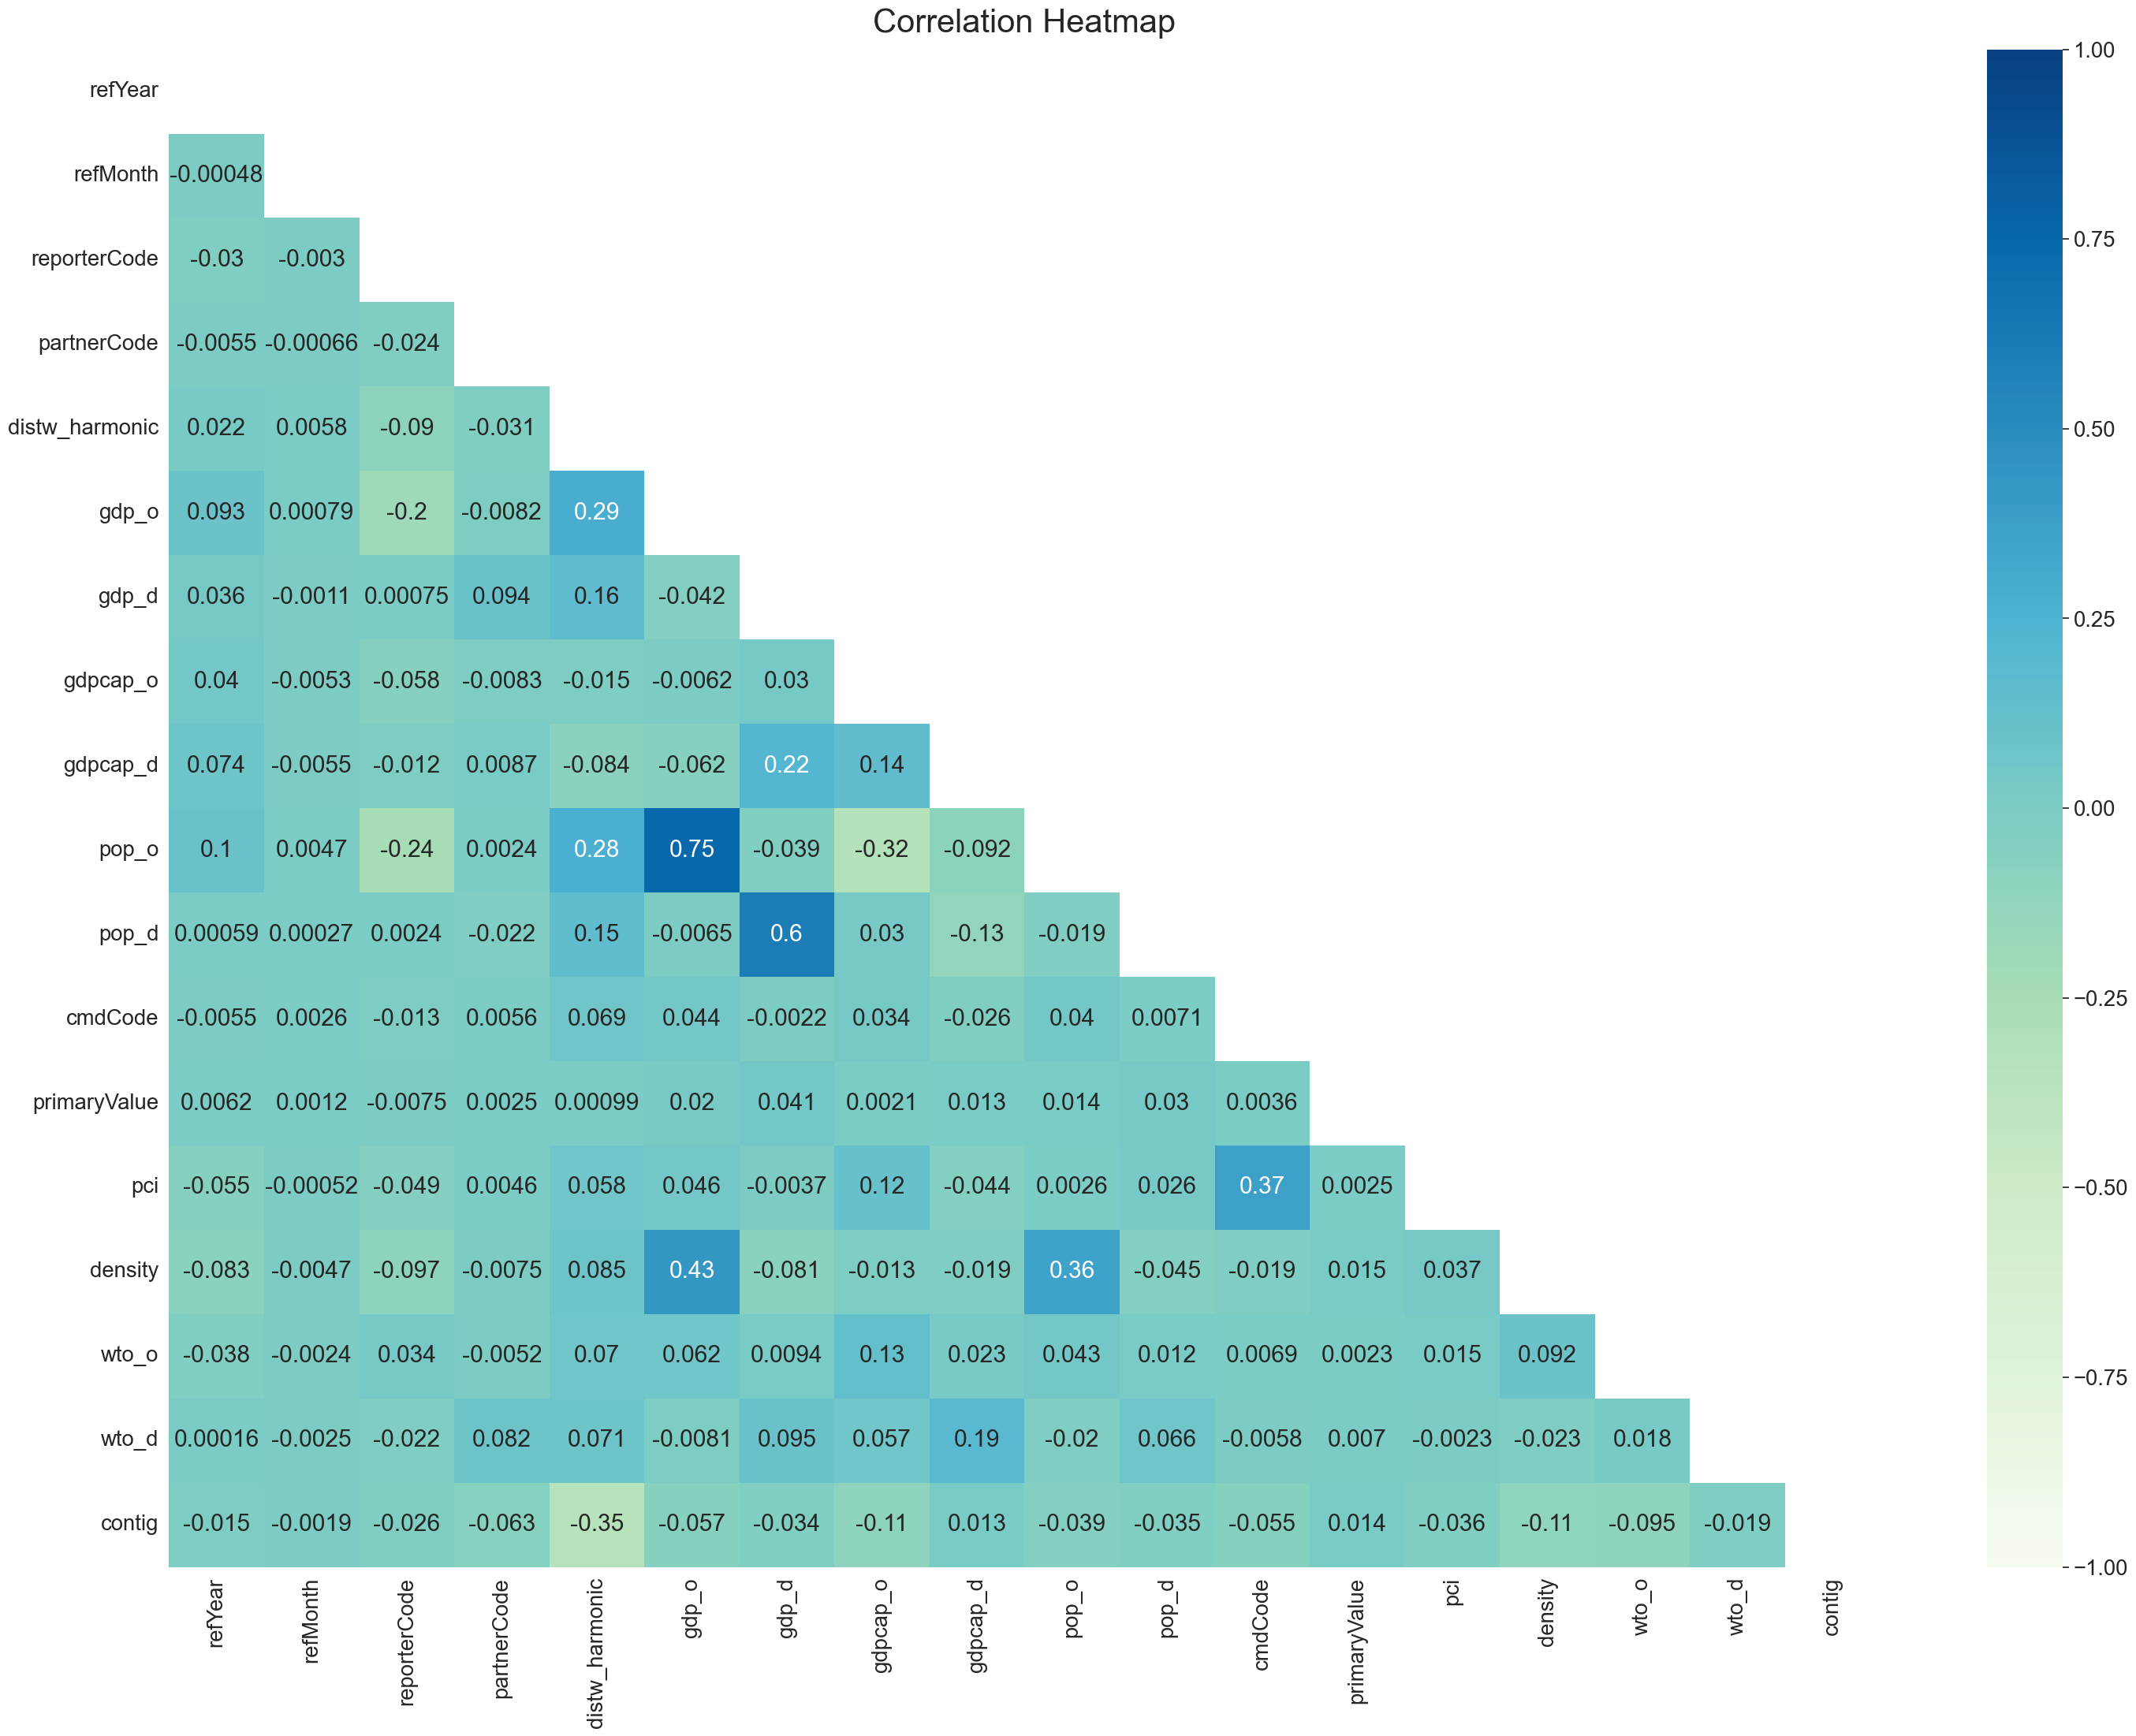

time: 1min 53s (started: 2024-04-29 12:33:39 +03:00)


In [12]:
plt.rcParams["figure.figsize"] = (35,25)

corr_matrix = data[['refYear','refMonth', 'reporterCode', 'partnerCode', 'distw_harmonic', 'gdp_o', 'gdp_d', 'gdpcap_o', 'gdpcap_d', 'pop_o', 'pop_d'
      ,'cmdCode', 'primaryValue', 'pci', 'density','wto_o','wto_d','contig']].corr()
sn.set(font_scale=1.8)
# mask = np.triu(np.ones_like(corr_matrix))
ax = plt.axes()
# Create a mask with zeros
mask = np.zeros_like(corr_matrix, dtype=bool)  # Replace np.bool with bool
# Set upper triangle of mask to True
mask[np.triu_indices_from(mask)] = True
# Assuming ax is your matplotlib axes object, set its face color
ax.set_facecolor("white")

heatmap = sn.heatmap(corr_matrix, annot=True, mask=mask, vmin=-1, vmax=1, cmap='GnBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':30}, pad=16)
plt.show()

In [13]:
corr_matrix

,refYear,refMonth,reporterCode,partnerCode,distw_harmonic,gdp_o,gdp_d,gdpcap_o,gdpcap_d,pop_o,pop_d,cmdCode,primaryValue,pci,density,wto_o,wto_d,contig
refYear,1.000000,-0.000475,-0.029657,-0.005455,0.022263,0.092691,0.036106,0.040087,0.073575,0.101446,0.000590,-0.005465,0.006183,-0.055458,-0.083172,-0.037590,0.000160,-0.014522
refMonth,-0.000475,1.000000,-0.003047,-0.000665,0.005760,0.000788,-0.001110,-0.005334,-0.005507,0.004747,0.000271,0.002586,0.001162,-0.000522,-0.004674,-0.002388,-0.002459,-0.001902
reporterCode,-0.029657,-0.003047,1.000000,-0.023704,-0.089696,-0.199715,0.000751,-0.057998,-0.012181,-0.238861,0.002439,-0.012927,-0.007545,-0.049473,-0.097116,0.034265,-0.022407,-0.025864
partnerCode,-0.005455,-0.000665,-0.023704,1.000000,-0.031240,-0.008170,0.094173,-0.008252,0.008707,0.002388,-0.021777,0.005583,0.002514,0.004624,-0.007502,-0.005190,0.081601,-0.062992
distw_harmonic,0.022263,0.005760,-0.089696,-0.031240,1.000000,0.288634,0.159761,-0.015077,-0.083547,0.281163,0.149945,0.069462,0.000988,0.058300,0.085232,0.069656,0.071382,-0.349481
gdp_o,0.092691,0.000788,-0.199715,-0.008170,0.288634,1.000000,-0.041803,-0.006235,-0.062241,0.749182,-0.006544,0.044304,0.019843,0.045555,0.431146,0.062434,-0.008085,-0.057026
gdp_d,0.036106,-0.001110,0.000751,0.094173,0.159761,-0.041803,1.000000,0.030319,0.216589,-0.038668,0.604479,-0.002248,0.040570,-0.003702,-0.081397,0.009394,0.095427,-0.033645
gdpcap_o,0.040087,-0.005334,-0.057998,-0.008252,-0.015077,-0.006235,0.030319,1.000000,0.143054,-0.323128,0.030495,0.033824,0.002119,0.116855,-0.012512,0.126688,0.056889,-0.106297
gdpcap_d,0.073575,-0.005507,-0.012181,0.008707,-0.083547,-0.062241,0.216589,0.143054,1.000000,-0.092418,-0.125835,-0.026280,0.012800,-0.044477,-0.018699,0.022990,0.187811,0.012849
pop_o,0.101446,0.004747,-0.238861,0.002388,0.281163,0.749182,-0.038668,-0.323128,-0.092418,1.000000,-0.018793,0.040355,0.014053,0.002580,0.359236,0.042766,-0.019650,-0.039477


time: 27.1 ms (started: 2024-04-29 12:36:15 +03:00)


In [14]:
# Create a mask for the lower triangular portion of the correlation matrix
mask = np.tril(np.ones(corr_matrix.shape)).astype(bool)
# Apply the mask to the correlation matrix to mask the lower triangular portion
masked_corr_matrix = corr_matrix.mask(mask)
# Unstack the correlation matrix and reset the index
corr = masked_corr_matrix.unstack().reset_index()
corr.columns = ['feature_1','feature_2','corr'] #rename columns to something readable
corr[ corr['corr'].abs() > 0.2 ][corr['feature_1']!=corr['feature_2']].sort_values('corr')

/var/folders/13/n6g9f1g56kz51t0nxp0_xbcr0000gq/T/ipykernel_97282/3478503348.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr[ corr['corr'].abs() > 0.2 ][corr['feature_1']!=corr['feature_2']].sort_values('corr')


,feature_1,feature_2,corr
310,contig,distw_harmonic,-0.349481
169,pop_o,gdpcap_o,-0.323128
164,pop_o,reporterCode,-0.238861
150,gdpcap_d,gdp_d,0.216589
166,pop_o,distw_harmonic,0.281163
94,gdp_o,distw_harmonic,0.288634
261,density,pop_o,0.359236
245,pci,cmdCode,0.370146
257,density,gdp_o,0.431146
186,pop_d,gdp_d,0.604479


time: 26 ms (started: 2024-04-29 12:36:17 +03:00)


# 2. Distribution

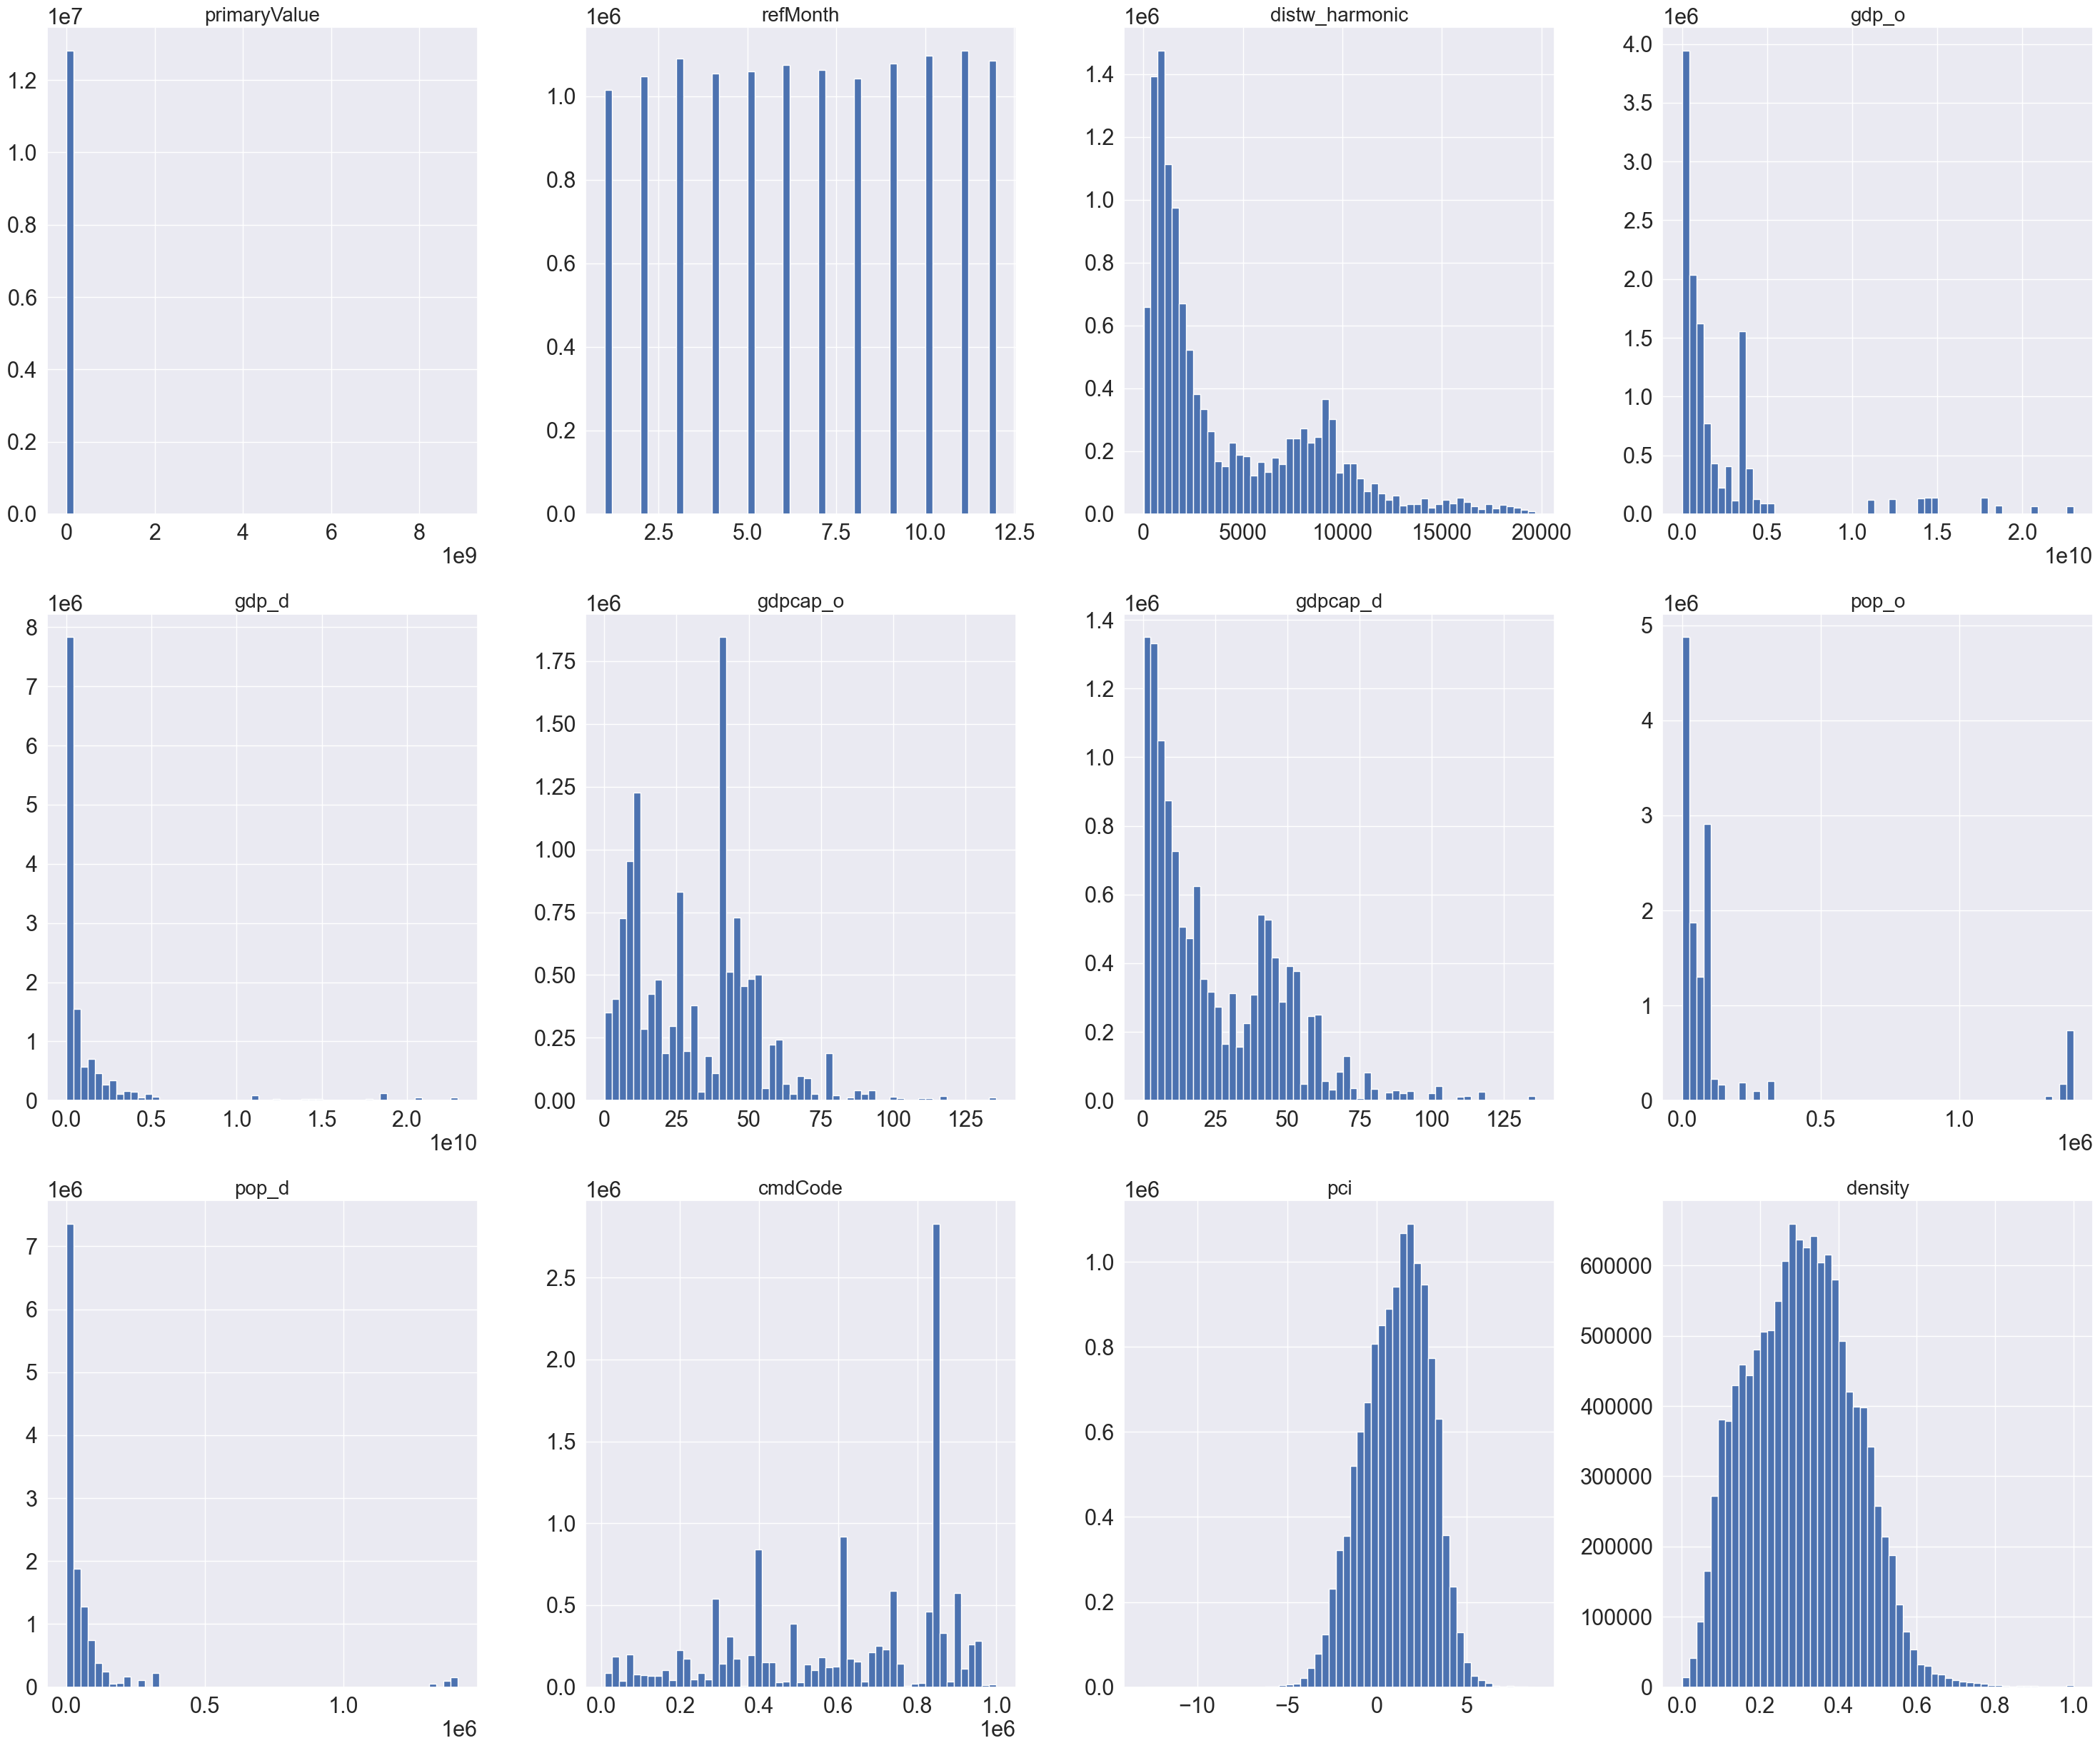

time: 12.8 s (started: 2024-04-29 12:37:21 +03:00)


In [16]:
import seaborn as sns

# Sample your data with "primaryValue" as the first column
sampled_data = data[['primaryValue', 'refMonth', 'distw_harmonic', 'gdp_o', 'gdp_d', 'gdpcap_o', 'gdpcap_d', 'pop_o', 'pop_d', 'cmdCode', 'pci', 'density']].sample(frac=0.05)

# Set the seaborn font scale and background color
plt.rcParams['axes.facecolor'] = 'white'
sns.set(font_scale=2)

# Create a figure and axis for your histogram
fig, axes = plt.subplots(3, 4, figsize=(30, 25))

# Create the histograms using Matplotlib
for i, column in enumerate(sampled_data.columns):
    ax = axes[i // 4, i % 4]
    ax.hist(sampled_data[column], bins=55)
    ax.set_title(column, fontsize=20)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Save the figure as EPS
plt.tight_layout()
